<a href="https://colab.research.google.com/github/sneha5678-cmyk/genai-frontend/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install ipywidgets
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display, clear_output

# Updated Sample Data - Each company now has multiple brands
companies_data = {
    "HUL": {
        "brands": ["TRESemmé", "Dove", "Sunsilk"]
    },
    "Dabur": {
        "brands": ["Vatika", "Dabur Almond", "Anmol Coconut"]
    },
    "P&G": {
        "brands": ["Pantene", "Head & Shoulders", "Rejoice"]
    }
}

# Retailer sample data
retailers = {
    "Retailer 1": {"location": "Delhi", "type": "Supermarket", "sales_volume": 500000, "profit_margin": 15},
    "Retailer 2": {"location": "Mumbai", "type": "General Trade", "sales_volume": 300000, "profit_margin": 10},
    "Retailer 3": {"location": "Kolkata", "type": "General Trade", "sales_volume": 200000, "profit_margin": 12},
    "Retailer 4": {"location": "Chennai", "type": "Supermarket", "sales_volume": 450000, "profit_margin": 14},
    "Retailer 5": {"location": "Lucknow", "type": "General Trade", "sales_volume": 150000, "profit_margin": 8},
    "Retailer 6": {"location": "Hyderabad", "type": "Supermarket", "sales_volume": 350000, "profit_margin": 13}
}

# Widgets
retailer_dropdown = widgets.Dropdown(options=retailers.keys(), description="Retailer:")
company_dropdown = widgets.Dropdown(options=companies_data.keys(), description="Company:")
brand_dropdown = widgets.Dropdown(options=[], description="Brand:")
output = widgets.Output()

# Update brand options based on company selection
def update_brand_options(change):
    company = change.new
    if company:
        brand_dropdown.options = companies_data[company]['brands']
    else:
        brand_dropdown.options = []

company_dropdown.observe(update_brand_options, names='value')

# Core recommendation logic
def generate_recommendation(b):
    output.clear_output()
    with output:
        retailer = retailer_dropdown.value
        company = company_dropdown.value
        brand = brand_dropdown.value

        if not brand:
            print("⚠️ Please select a brand!")
            return

        retailer_data = retailers[retailer]

        # Sample mock calculation
        current_profit = int(retailer_data['sales_volume'] * 0.15)
        forecasted_brand_profit = int(current_profit * 1.2)
        forecasted_retailer_profit = int(forecasted_brand_profit * retailer_data['profit_margin'] / 100)
        inventory_turnover = round(retailer_data['sales_volume'] / 200000, 2)

        # Final Display
        print(f"✅ Retailer Selected: {retailer}")
        print(f"✅ Company Selected: {company}")
        print(f"✅ Brand Selected: {brand}")
        print(f"✅ Profile-Matched Best Practice: Similar pattern found in {retailer_data['location']} region.")
        print(f"✅ Current Profit to Brand: ₹{current_profit}")
        print(f"✅ Forecasted Profit - Brand: ₹{forecasted_brand_profit}")
        print(f"✅ Forecasted Profit - Retailer: ₹{forecasted_retailer_profit}")
        print(f"✅ Inventory Turnover Rate: {inventory_turnover}")
        print(f"✅ Recommendation: Focus on {brand} to maximize growth potential.")

# Button to generate recommendation
recommend_button = widgets.Button(description="Generate Recommendation")
recommend_button.on_click(generate_recommendation)

# Display the UI
display(retailer_dropdown, company_dropdown, brand_dropdown, recommend_button, output)

# Initialize the brand dropdown with default company
update_brand_options(widgets.widgets.interaction.Bunch(new=company_dropdown.value))


Dropdown(description='Retailer:', options=('Retailer 1', 'Retailer 2', 'Retailer 3', 'Retailer 4', 'Retailer 5…

Dropdown(description='Company:', options=('HUL', 'Dabur', 'P&G'), value='HUL')

Dropdown(description='Brand:', options=(), value=None)

Button(description='Generate Recommendation', style=ButtonStyle())

Output()

AttributeError: module 'ipywidgets.widgets.interaction' has no attribute 'Bunch'

In [13]:
# Install all necessary libraries
!pip install ipywidgets matplotlib pandas fpdf2

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import io

# Company, Brand, SKU Data
companies_data = {
    "HUL": {
        "brands": {
            "TRESemmé": ["TRESemmé Shampoo", "TRESemmé Conditioner", "TRESemmé Serum"],
            "Dove": ["Dove Soap", "Dove Shampoo", "Dove Lotion"],
            "Sunsilk": ["Sunsilk Black", "Sunsilk Yellow", "Sunsilk Pink"]
        }
    },
    "Dabur": {
        "brands": {
            "Vatika": ["Vatika Hair Oil", "Vatika Shampoo", "Vatika Styling Cream"],
            "Dabur Almond": ["Almond Hair Oil", "Almond Body Lotion"],
            "Anmol Coconut": ["Anmol Coconut Oil"]
        }
    },
    "P&G": {
        "brands": {
            "Pantene": ["Pantene Shampoo", "Pantene Conditioner"],
            "Head & Shoulders": ["H&S Shampoo", "H&S Conditioner"],
            "Rejoice": ["Rejoice Shampoo"]
        }
    }
}

# Retailer default data if no CSV uploaded
default_retailers = {
    "Retailer 1": {"location": "Delhi", "type": "Supermarket", "sales_volume": 500000, "profit_margin": 15},
    "Retailer 2": {"location": "Mumbai", "type": "General Trade", "sales_volume": 300000, "profit_margin": 10},
    "Retailer 3": {"location": "Kolkata", "type": "General Trade", "sales_volume": 200000, "profit_margin": 12},
    "Retailer 4": {"location": "Chennai", "type": "Supermarket", "sales_volume": 450000, "profit_margin": 14},
}

retailers = default_retailers.copy()

# Upload Retailer CSV
upload = widgets.FileUpload(accept='.csv', multiple=False)

# Widgets
retailer_dropdown = widgets.Dropdown(options=retailers.keys(), description="Retailer:")
company_dropdown = widgets.Dropdown(options=companies_data.keys(), description="Company:")
brand_dropdown = widgets.Dropdown(options=[], description="Brand:")
sku_dropdown = widgets.Dropdown(options=[], description="SKU:")
output = widgets.Output()

# Dynamic update of brands based on company
def update_brands(change):
    company = change.new
    if company:
        brand_dropdown.options = list(companies_data[company]['brands'].keys())
        update_skus(widgets.widgets.interaction.Bunch(new=brand_dropdown.value))
company_dropdown.observe(update_brands, names='value')

# Dynamic update of SKUs based on brand
def update_skus(change):
    company = company_dropdown.value
    brand = change.new
    if company and brand:
        sku_dropdown.options = companies_data[company]['brands'][brand]
    else:
        sku_dropdown.options = []
brand_dropdown.observe(update_skus, names='value')

# CSV Loader Function
def load_csv(change):
    if upload.value:
        content = list(upload.value.values())[0]['content']
        df = pd.read_csv(io.BytesIO(content))
        # Ensure retailer names are unique
        global retailers
        retailers = {}
        for _, row in df.iterrows():
            retailers[row['Retailer']] = {
                "location": row['Location'],
                "type": row['Type'],
                "sales_volume": row['SalesVolume'],
                "profit_margin": row['ProfitMargin']
            }
        retailer_dropdown.options = retailers.keys()
        with output:
            print("✅ Retailer data loaded from CSV!")

upload.observe(load_csv, names='value')

# Generate recommendation + Plot + PDF
def generate_recommendation(b):
    output.clear_output()
    with output:
        retailer = retailer_dropdown.value
        company = company_dropdown.value
        brand = brand_dropdown.value
        sku = sku_dropdown.value

        if not all([retailer, company, brand, sku]):
            print("⚠️ Please make all selections!")
            return

        retailer_data = retailers[retailer]

        current_profit = int(retailer_data['sales_volume'] * 0.15)
        forecasted_brand_profit = int(current_profit * 1.2)
        forecasted_retailer_profit = int(forecasted_brand_profit * retailer_data['profit_margin'] / 100)
        inventory_turnover = round(retailer_data['sales_volume'] / 200000, 2)

        # Print Recommendation
        result_text = f"""
✅ Retailer: {retailer}
✅ Company: {company}
✅ Brand: {brand}
✅ SKU: {sku}
✅ Location Best Practice: Similar success in {retailer_data['location']}
✅ Current Brand Profit: ₹{current_profit}
✅ Forecasted Brand Profit: ₹{forecasted_brand_profit}
✅ Forecasted Retailer Profit: ₹{forecasted_retailer_profit}
✅ Inventory Turnover Rate: {inventory_turnover}
"""
        print(result_text)

        # Plotting
        plt.figure(figsize=(6,4))
        plt.bar(['Current Profit', 'Forecasted Brand', 'Forecasted Retailer'],
                [current_profit, forecasted_brand_profit, forecasted_retailer_profit],
                color=['blue', 'green', 'orange'])
        plt.title('Profit Comparison')
        plt.ylabel('Profit (₹)')
        plt.show()

        # PDF Export
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        for line in result_text.strip().split("\n"):
            pdf.cell(200, 10, txt=line, ln=1)
        pdf_file = "Recommendation_Report.pdf"
        pdf.output(pdf_file)
        print(f"✅ PDF Report Generated: {pdf_file}")

# Button to generate recommendation
recommend_button = widgets.Button(description="Generate Recommendation")
recommend_button.on_click(generate_recommendation)

# Display all UI
display(upload, retailer_dropdown, company_dropdown, brand_dropdown, sku_dropdown, recommend_button, output)

# Initialize Brand and SKU dropdowns
update_brands(widgets.widgets.interaction.Bunch(new=company_dropdown.value))


FileUpload(value={}, accept='.csv', description='Upload')

Dropdown(description='Retailer:', options=('Retailer 1', 'Retailer 2', 'Retailer 3', 'Retailer 4'), value='Ret…

Dropdown(description='Company:', options=('HUL', 'Dabur', 'P&G'), value='HUL')

Dropdown(description='Brand:', options=(), value=None)

Dropdown(description='SKU:', options=(), value=None)

Button(description='Generate Recommendation', style=ButtonStyle())

Output()

AttributeError: module 'ipywidgets.widgets.interaction' has no attribute 'Bunch'

In [ ]:
# Install required libraries
!pip install ipywidgets matplotlib pandas scikit-learn fpdf2

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from fpdf import FPDF
import io

# Company, Brand, SKU Data with sample price
companies_data = {
    "HUL": {
        "brands": {
            "TRESemmé": [{"sku": "TRESemmé Shampoo", "price": 250}, {"sku": "TRESemmé Conditioner", "price": 300}],
            "Dove": [{"sku": "Dove Soap", "price": 40}, {"sku": "Dove Shampoo", "price": 180}],
            "Sunsilk": [{"sku": "Sunsilk Black", "price": 150}, {"sku": "Sunsilk Yellow", "price": 145}]
        }
    },
    "Dabur": {
        "brands": {
            "Vatika": [{"sku": "Vatika Hair Oil", "price": 130}, {"sku": "Vatika Shampoo", "price": 140}],
            "Dabur Almond": [{"sku": "Almond Hair Oil", "price": 120}],
            "Anmol Coconut": [{"sku": "Anmol Coconut Oil", "price": 100}]
        }
    },
    "P&G": {
        "brands": {
            "Pantene": [{"sku": "Pantene Shampoo", "price": 200}],
            "Head & Shoulders": [{"sku": "H&S Shampoo", "price": 180}],
            "Rejoice": [{"sku": "Rejoice Shampoo", "price": 160}]
        }
    }
}

# Default retailer data
default_retailers = {
    "Retailer 1": {"location": "Delhi", "type": "Supermarket", "sales_volume": 500000, "profit_margin": 15},
    "Retailer 2": {"location": "Mumbai", "type": "General Trade", "sales_volume": 300000, "profit_margin": 10},
    "Retailer 3": {"location": "Kolkata", "type": "General Trade", "sales_volume": 200000, "profit_margin": 12}
}
retailers = default_retailers.copy()

# UI Widgets
upload = widgets.FileUpload(accept='.csv', multiple=False)
retailer_dropdown = widgets.Dropdown(options=retailers.keys(), description="Retailer:")
company_dropdown = widgets.Dropdown(options=companies_data.keys(), description="Company:")
brand_dropdown = widgets.Dropdown(options=[], description="Brand:")
sku_dropdown = widgets.Dropdown(options=[], description="SKU:")
output = widgets.Output()

# Dynamic Brand Update
def update_brands(change):
    company = change.new
    if company:
        brand_dropdown.options = list(companies_data[company]['brands'].keys())
        update_skus(widgets.widgets.interaction.Bunch(new=brand_dropdown.value))

company_dropdown.observe(update_brands, names='value')

# Dynamic SKU Update
def update_skus(change):
    company = company_dropdown.value
    brand = change.new
    if company and brand:
        sku_dropdown.options = [item['sku'] for item in companies_data[company]['brands'][brand]]
    else:
        sku_dropdown.options = []
brand_dropdown.observe(update_skus, names='value')

# CSV Loader
def load_csv(change):
    if upload.value:
        content = list(upload.value.values())[0]['content']
        df = pd.read_csv(io.BytesIO(content))
        global retailers
        retailers = {}
        for _, row in df.iterrows():
            retailers[row['Retailer']] = {
                "location": row['Location'],
                "type": row['Type'],
                "sales_volume": row['SalesVolume'],
                "profit_margin": row['ProfitMargin']
            }
        retailer_dropdown.options = retailers.keys()
        with output:
            print("✅ Retailer data loaded from CSV!")

upload.observe(load_csv, names='value')

# ML Predictor (Simple Linear Regression based on price predicting demand)
def predict_demand(price):
    # Dummy training data: (Price vs Demand pattern)
    X = np.array([[100], [150], [200], [250], [300], [350]]).reshape(-1, 1)
    y = np.array([5000, 4500, 4000, 3500, 3000, 2500])  # Lower price, higher demand
    model = LinearRegression().fit(X, y)
    predicted_demand = model.predict([[price]])[0]
    return max(int(predicted_demand), 0)

# Generate Recommendation & ML Prediction
def generate_recommendation(b):
    output.clear_output()
    with output:
        retailer = retailer_dropdown.value
        company = company_dropdown.value
        brand = brand_dropdown.value
        sku_name = sku_dropdown.value

        if not all([retailer, company, brand, sku_name]):
            print("⚠️ Please make all selections!")
            return

        retailer_data = retailers[retailer]
        sku_price = next(item['price'] for item in companies_data[company]['brands'][brand] if item['sku'] == sku_name)
        predicted_demand = predict_demand(sku_price)

        # Forecasting
        current_profit = int(retailer_data['sales_volume'] * 0.15)
        forecasted_profit = int(predicted_demand * sku_price * retailer_data['profit_margin'] / 100)

        recommendation = ""
        if sku_price <= 200:
            recommendation = "✅ Good price point. Expected to perform well in General Trade."
        elif sku_price <= 300:
            recommendation = "✅ Suitable for Supermarkets. Monitor inventory turnover."
        else:
            recommendation = "⚠️ Premium SKU. Push only in premium outlets."

        # Print result
        result_text = f"""
✅ Retailer: {retailer}
✅ Company: {company}
✅ Brand: {brand}
✅ SKU: {sku_name}
✅ SKU Price: ₹{sku_price}
✅ Predicted Demand: {predicted_demand} units
✅ Forecasted Retailer Profit: ₹{forecasted_profit}
✅ Recommendation: {recommendation}
"""

        print(result_text)

        # Bar Chart
        plt.figure(figsize=(6, 4))
        plt.bar(['Current Profit', 'Forecasted Profit'], [current_profit, forecasted_profit], color=['blue', 'green'])
        plt.title('Profit Comparison')
        plt.ylabel('Profit (₹)')
        plt.show()

        # PDF Export
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        for line in result_text.strip().split("\n"):
            pdf.cell(200, 10, txt=line, ln=1)
        pdf_file = "SKU_Recommendation_Report.pdf"
        pdf.output(pdf_file)
        print(f"✅ PDF Report Generated: {pdf_file}")

recommend_button = widgets.Button(description="Generate Recommendation")
recommend_button.on_click(generate_recommendation)

# Display UI
display(upload, retailer_dropdown, company_dropdown, brand_dropdown, sku_dropdown, recommend_button, output)
update_brands(widgets.widgets.interaction.Bunch(new=company_dropdown.value))


FileUpload(value={}, accept='.csv', description='Upload')

Dropdown(description='Retailer:', options=('Retailer 1', 'Retailer 2', 'Retailer 3'), value='Retailer 1')

Dropdown(description='Company:', options=('HUL', 'Dabur', 'P&G'), value='HUL')

Dropdown(description='Brand:', options=(), value=None)

Dropdown(description='SKU:', options=(), value=None)

Button(description='Generate Recommendation', style=ButtonStyle())

Output()

AttributeError: module 'ipywidgets.widgets.interaction' has no attribute 'Bunch'

AttributeError: module 'ipywidgets.widgets.interaction' has no attribute 'Bunch'

KeyError: 'Dabur Almond'

AttributeError: module 'ipywidgets.widgets.interaction' has no attribute 'Bunch'

In [4]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from fpdf import FPDF
from fpdf.enums import XPos, YPos
from types import SimpleNamespace
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample Data
companies_data = {
    'HUL': {'brands': {'TRESemmé': ['Keratin Smooth', 'Botanique Detox'],
                       'Dove': ['Intense Repair', 'Daily Shine'],
                       'Sunsilk': ['Black Shine', 'Long & Healthy']}},
    'Dabur': {'brands': {'Vatika': ['Olive Enriched', 'Argan Enriched'],
                         'Dabur Almond': ['Almond Hair Oil'],
                         'Anmol Coconut': ['Coconut Hair Oil']}},
    'P&G': {'brands': {'Pantene': ['Hair Fall Control', 'Silky Smooth Care'],
                       'Head & Shoulders': ['Cool Menthol', 'Anti-Dandruff'],
                       'Rejoice': ['Rich Soft Smooth']}}
}

# Simulated SKU pricing data
sku_price_data = pd.DataFrame({
    'Company': ['HUL', 'HUL', 'Dabur', 'P&G', 'P&G'],
    'Brand': ['Dove', 'TRESemmé', 'Vatika', 'Pantene', 'Head & Shoulders'],
    'SKU': ['Intense Repair', 'Keratin Smooth', 'Olive Enriched', 'Hair Fall Control', 'Cool Menthol'],
    'Price': [250, 350, 150, 300, 280],
    'Sales': [1000, 800, 1200, 900, 950]  # Dummy sales for ML model
})

# Widgets
company_dropdown = widgets.Dropdown(options=list(companies_data.keys()), description='Company:')
brand_dropdown = widgets.Dropdown(options=[], description='Brand:')
sku_dropdown = widgets.Dropdown(options=[], description='SKU:')
target_price = widgets.IntText(value=300, description='Target ₹:')
recommend_button = widgets.Button(description='Recommend SKU')
output = widgets.Output()

# Update Brand dropdown based on company selection
def update_brands(change):
    company = change.new
    if company:
        brand_dropdown.options = list(companies_data[company]['brands'].keys())
        # Update SKU as well
        update_skus(SimpleNamespace(new=brand_dropdown.value))

company_dropdown.observe(update_brands, names='value')

# Update SKU dropdown based on brand
def update_skus(change):
    brand = change.new
    company = company_dropdown.value
    if company and brand:
        sku_dropdown.options = companies_data[company]['brands'][brand]

brand_dropdown.observe(update_skus, names='value')

# ML model for SKU recommendation
def recommend_sku(target_price_val):
    df = sku_price_data.copy()
    model = LinearRegression()
    model.fit(df[['Price']], df['Sales'])
    df['Predicted_Sales'] = model.predict(df[['Price']])
    df['Price_Diff'] = (df['Price'] - target_price_val).abs()

    # Select top 3 closest to price and best predicted sales
    recommended = df.sort_values(by=['Price_Diff', 'Predicted_Sales'], ascending=[True, False]).head(3)
    return recommended

# Generate PDF Report with Unicode font
def generate_pdf(recommendations):
    pdf = FPDF()
    pdf.add_page()
    pdf.add_font('DejaVu', '', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', uni=True)
    pdf.set_font('DejaVu', '', 12)
    pdf.cell(200, 10, text='SKU Price-Based Recommendations ✅', new_x=XPos.LMARGIN, new_y=YPos.NEXT)
    pdf.ln(5)
    for _, row in recommendations.iterrows():
        line = f"Company: {row['Company']} | Brand: {row['Brand']} | SKU: {row['SKU']} | Price: ₹{row['Price']} | Predicted Sales: {round(row['Predicted_Sales'])}"
        pdf.cell(200, 10, text=line, new_x=XPos.LMARGIN, new_y=YPos.NEXT)
    pdf.output('SKU_Recommendation_Report.pdf')
    return 'PDF Report Generated: SKU_Recommendation_Report.pdf'

# On Click Event
def on_recommend_clicked(b):
    output.clear_output()
    with output:
        selected_company = company_dropdown.value
        selected_brand = brand_dropdown.value
        selected_sku = sku_dropdown.value
        price = target_price.value

        print(f"Selected -> Company: {selected_company}, Brand: {selected_brand}, SKU: {selected_sku}")
        print(f"Target Price: ₹{price}")

        recommendations = recommend_sku(price)
        print("\nRecommended SKUs based on price proximity and predicted sales:")
        print(recommendations[['Company', 'Brand', 'SKU', 'Price', 'Predicted_Sales']])

        pdf_status = generate_pdf(recommendations)
        print(pdf_status)

recommend_button.on_click(on_recommend_clicked)

# Display UI
display(company_dropdown, brand_dropdown, sku_dropdown, target_price, recommend_button, output)

# Initialize with default
update_brands(SimpleNamespace(new=company_dropdown.value))


Dropdown(description='Company:', options=('HUL', 'Dabur', 'P&G'), value='HUL')

Dropdown(description='Brand:', options=(), value=None)

Dropdown(description='SKU:', options=(), value=None)

IntText(value=300, description='Target ₹:')

Button(description='Recommend SKU', style=ButtonStyle())

Output()

In [2]:
!pip install pandas numpy matplotlib scikit-learn fpdf2 ipywidgets statsmodels plotly --quiet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fpdf import FPDF
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Sample dataset with monthly demand for forecasting
data = {
    'Company': ['HUL', 'HUL', 'HUL', 'Dabur', 'Dabur', 'P&G', 'P&G', 'P&G'],
    'Brand': ['Dove', 'TRESemmé', 'Sunsilk', 'Vatika', 'Dabur Almond', 'Pantene', 'Head & Shoulders', 'Rejoice'],
    'SKU': ['Intense Repair', 'Keratin Smooth', 'Black Shine', 'Olive Enriched', 'Nourish Oil', 'Hair Fall Control', 'Cool Menthol', 'Silky Soft'],
    'Price': [250, 300, 200, 150, 180, 280, 260, 220],
    'Sales': [1000, 800, 900, 1100, 950, 1200, 1150, 980],
    'Region': ['North', 'South', 'West', 'North', 'East', 'West', 'South', 'North'],
    'Retailer': ['Reliance', 'DMart', 'Local', 'DMart', 'Reliance', 'Local', 'Reliance', 'DMart'],
    'Pack_Size': [340, 320, 330, 300, 280, 340, 320, 310],
    'Margin': [0.15, 0.18, 0.14, 0.17, 0.16, 0.22, 0.20, 0.19],
}
df = pd.DataFrame(data)

# Adding monthly sales history for time-series forecast
np.random.seed(42)
monthly_sales = pd.DataFrame({f'Month_{i}': np.random.randint(800, 1200, size=len(df)) for i in range(1, 13)})
df = pd.concat([df, monthly_sales], axis=1)

# Widgets
region_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Region'].unique()), description='Region:')
retailer_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Retailer'].unique()), description='Retailer:')
company_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Company'].unique()), description='Company:')
target_price = widgets.IntSlider(value=250, min=100, max=350, step=10, description='Target ₹:')
recommend_button = widgets.Button(description="Run Dashboard")
output = widgets.Output()

# Train base ML Model
rf_model = RandomForestRegressor()
rf_model.fit(df[['Price', 'Margin']], df['Sales'])

def forecast_demand(sku_row):
    """Time-series Forecasting per SKU"""
    sales_series = sku_row[[f'Month_{i}' for i in range(1, 13)]].values.astype(float)
    model = ExponentialSmoothing(sales_series, trend='add', seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(3)  # Next 3 months
    return forecast.mean()

def price_sensitivity(sku_row):
    """Plot Price Sensitivity Curve"""
    prices = np.linspace(sku_row['Price'] * 0.7, sku_row['Price'] * 1.3, 10)
    sales = rf_model.predict(pd.DataFrame({'Price': prices, 'Margin': sku_row['Margin']}))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=prices, y=sales, mode='lines+markers', name='Predicted Sales'))
    fig.update_layout(title=f"Price Sensitivity - {sku_row['SKU']}", xaxis_title='Price', yaxis_title='Sales')
    fig.show()

def recommend_and_dashboard(b):
    with output:
        clear_output()
        filtered_df = df.copy()
        if region_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Region'] == region_dropdown.value]
        if retailer_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Retailer'] == retailer_dropdown.value]
        if company_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Company'] == company_dropdown.value]

        if filtered_df.empty:
            print("No data for selected filters.")
            return

        # Predictive Sales
        filtered_df['Predicted_Sales'] = rf_model.predict(filtered_df[['Price', 'Margin']])
        # Time-Series Demand Forecast
        filtered_df['Forecasted_Demand'] = filtered_df.apply(forecast_demand, axis=1)
        # Scoring logic
        filtered_df['Score'] = (filtered_df['Predicted_Sales'] * 0.4) + \
                               (filtered_df['Margin'] * 100 * 0.3) - \
                               (abs(filtered_df['Price'] - target_price.value) * 0.3)
        top_skus = filtered_df.sort_values(by='Score', ascending=False).head(3)

        display(top_skus[['Brand', 'SKU', 'Price', 'Predicted_Sales', 'Forecasted_Demand', 'Margin', 'Score']])

        # Plot Mobile Friendly Bar Chart
        fig = go.Figure(data=[
            go.Bar(name='Predicted Sales', x=top_skus['SKU'], y=top_skus['Predicted_Sales']),
            go.Bar(name='Forecasted Demand', x=top_skus['SKU'], y=top_skus['Forecasted_Demand'])
        ])
        fig.update_layout(barmode='group', title='SKU Sales vs Demand Forecast (Mobile-Optimized)')
        fig.show()

        # Generate PDF Report
        pdf = FPDF()
        pdf.add_page()
        pdf.add_font('DejaVu', '', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', uni=True)
        pdf.set_font('DejaVu', size=12)
        pdf.cell(200, 10, txt="✅ SKU Dashboard Report ✅", new_x="LMARGIN", new_y="NEXT")
        for _, row in top_skus.iterrows():
            line = f"⭐ {row['Brand']} | {row['SKU']} | ₹{row['Price']} | Pred Sales: {int(row['Predicted_Sales'])} | Forecasted: {int(row['Forecasted_Demand'])}"
            pdf.cell(200, 10, txt=line, new_x="LMARGIN", new_y="NEXT")
        pdf.output("SKU_Dashboard_Report.pdf")
        print("✅ PDF Generated: SKU_Dashboard_Report.pdf")

        # Show price sensitivity for best SKU
        print("\n💰 Price Sensitivity Analysis for Top SKU 💰")
        price_sensitivity(top_skus.iloc[0])

# Button click
recommend_button.on_click(recommend_and_dashboard)

# Mobile View - Stack widgets for better visibility
accordion = widgets.Accordion(children=[region_dropdown, retailer_dropdown, company_dropdown, target_price])
accordion.set_title(0, 'Select Region')
accordion.set_title(1, 'Select Retailer')
accordion.set_title(2, 'Select Company')
accordion.set_title(3, 'Set Target Price')

# Display everything
display(accordion, recommend_button, output)


Accordion(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value='…

Button(description='Run Dashboard', style=ButtonStyle())

Output()

In [7]:
# Install required libraries
!pip install pandas numpy matplotlib scikit-learn statsmodels fpdf2 plotly ipywidgets --quiet

import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fpdf import FPDF
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# ✅ Synthetic dataset generation - ensures no "No Data" errors
np.random.seed(42)
companies = ['HUL', 'Dabur', 'P&G']
brands = {'HUL': ['Dove', 'Sunsilk'], 'Dabur': ['Vatika', 'Dabur Almond'], 'P&G': ['Pantene', 'Head & Shoulders']}
retailers = ['Reliance', 'DMart', 'Local']
regions = ['North', 'South', 'East', 'West']
sku_list = []
for company in companies:
    for brand in brands[company]:
        for retailer in retailers:
            for region in regions:
                sku_list.append({
                    'Company': company,
                    'Brand': brand,
                    'SKU': f'{brand} - Shampoo',
                    'Price': np.random.randint(180, 350),
                    'Sales': np.random.randint(900, 1300),
                    'Region': region,
                    'Retailer': retailer,
                    'Pack_Size': np.random.choice([300, 340, 500]),
                    'Margin': np.round(np.random.uniform(0.12, 0.25), 2)
                })
df = pd.DataFrame(sku_list)
for i in range(1, 13):
    df[f'Month_{i}'] = np.random.randint(800, 1300, size=len(df))

# Widgets
region_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Region'].unique()), description='Region:')
retailer_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Retailer'].unique()), description='Retailer:')
company_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Company'].unique()), description='Company:')
brand_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Brand'].unique()), description='Brand:')
target_price = widgets.IntSlider(value=250, min=150, max=350, step=10, description='Target ₹:')
recommend_button = widgets.Button(description="Run Dashboard")
output = widgets.Output()

# Train ML Model
rf_model = RandomForestRegressor()
rf_model.fit(df[['Price', 'Margin']], df['Sales'])

# Forecast Demand
def forecast_demand(sku_row):
    series = sku_row[[f'Month_{i}' for i in range(1, 13)]].values.astype(float)
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(3)
    return forecast.mean()

# Price Sensitivity Plot
def price_sensitivity_plot(sku_row):
    prices = np.linspace(sku_row['Price'] * 0.7, sku_row['Price'] * 1.3, 10)
    sales = rf_model.predict(pd.DataFrame({'Price': prices, 'Margin': sku_row['Margin']}))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=prices, y=sales, mode='lines+markers', name='Sales vs Price'))
    fig.update_layout(title=f"Price Sensitivity - {sku_row['SKU']}", xaxis_title='Price', yaxis_title='Sales')
    fig.show()

# Dashboard Logic
def run_dashboard(b):
    with output:
        clear_output()
        filtered_df = df.copy()
        if region_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Region'] == region_dropdown.value]
        if retailer_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Retailer'] == retailer_dropdown.value]
        if company_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Company'] == company_dropdown.value]
        if brand_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Brand'] == brand_dropdown.value]

        if filtered_df.empty:
            print("⚠️ No data found for the selected filter combination. Please adjust the filters.")
            return

        filtered_df['Predicted_Sales'] = rf_model.predict(filtered_df[['Price', 'Margin']])
        filtered_df['Forecasted_Demand'] = filtered_df.apply(forecast_demand, axis=1)
        filtered_df['Score'] = (filtered_df['Predicted_Sales'] * 0.4) + \
                               (filtered_df['Margin'] * 100 * 0.3) - \
                               (abs(filtered_df['Price'] - target_price.value) * 0.3)

        top_skus = filtered_df.sort_values(by='Score', ascending=False).head(3)

        # Display
        display(top_skus[['Brand', 'SKU', 'Price', 'Predicted_Sales', 'Forecasted_Demand', 'Margin', 'Score']])

        # Mobile-Friendly Chart
        fig = go.Figure(data=[
            go.Bar(name='Predicted Sales', x=top_skus['SKU'], y=top_skus['Predicted_Sales']),
            go.Bar(name='Forecasted Demand', x=top_skus['SKU'], y=top_skus['Forecasted_Demand'])
        ])
        fig.update_layout(barmode='group', title='SKU Sales vs Demand Forecast (Mobile View)')
        fig.show()

        # PDF Report
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        pdf.cell(200, 10, txt="✅ SKU Dashboard Report ✅", ln=True)
        for _, row in top_skus.iterrows():
            line = f"⭐ {row['Brand']} | {row['SKU']} | ₹{row['Price']} | Pred: {int(row['Predicted_Sales'])} | Forecast: {int(row['Forecasted_Demand'])}"
            pdf.cell(200, 10, txt=line, ln=True)
        pdf.output("SKU_Dashboard_Report.pdf")
        print("✅ PDF Generated: SKU_Dashboard_Report.pdf")

        # Price Sensitivity for Top SKU
        print("\n💰 Price Sensitivity Analysis for Top SKU 💰")
        price_sensitivity_plot(top_skus.iloc[0])

# Button trigger
recommend_button.on_click(run_dashboard)

# Display
accordion = widgets.Accordion(children=[region_dropdown, retailer_dropdown, company_dropdown, brand_dropdown, target_price])
accordion.set_title(0, 'Select Region')
accordion.set_title(1, 'Select Retailer')
accordion.set_title(2, 'Select Company')
accordion.set_title(3, 'Select Brand')
accordion.set_title(4, 'Set Target Price')

display(accordion, recommend_button, output)


Accordion(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value='…

Button(description='Run Dashboard', style=ButtonStyle())

Output()

In [8]:
# Install libraries
!pip install pandas numpy matplotlib scikit-learn statsmodels fpdf2 plotly ipywidgets --quiet

import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fpdf import FPDF
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# ✅ Synthetic Data Generation - Retailer Profiles 1 to 6
np.random.seed(42)
companies = ['HUL', 'Dabur', 'P&G']
brands = {'HUL': ['Dove', 'Sunsilk'], 'Dabur': ['Vatika', 'Dabur Almond'], 'P&G': ['Pantene', 'Head & Shoulders']}
retailers = ['Retailer_1', 'Retailer_2', 'Retailer_3', 'Retailer_4', 'Retailer_5', 'Retailer_6']
regions = ['North', 'South', 'East', 'West']
sku_list = []
for company in companies:
    for brand in brands[company]:
        for retailer in retailers:
            for region in regions:
                sku_list.append({
                    'Company': company,
                    'Brand': brand,
                    'SKU': f'{brand} - Shampoo',
                    'Price': np.random.randint(180, 350),
                    'Sales': np.random.randint(900, 1300),
                    'Region': region,
                    'Retailer': retailer,
                    'Pack_Size': np.random.choice([300, 340, 500]),
                    'Margin': np.round(np.random.uniform(0.12, 0.25), 2)
                })
df = pd.DataFrame(sku_list)
for i in range(1, 13):
    df[f'Month_{i}'] = np.random.randint(800, 1300, size=len(df))

# Widgets
region_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Region'].unique()), description='Region:')
retailer_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Retailer'].unique()), description='Retailer:')
company_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Company'].unique()), description='Company:')
brand_dropdown = widgets.Dropdown(options=['All'] + sorted(df['Brand'].unique()), description='Brand:')
target_price = widgets.IntSlider(value=250, min=150, max=350, step=10, description='Target ₹:')
recommend_button = widgets.Button(description="Run Dashboard")
output = widgets.Output()

# ML Model Training
rf_model = RandomForestRegressor()
rf_model.fit(df[['Price', 'Margin']], df['Sales'])

# Demand Forecast Function
def forecast_demand(sku_row):
    series = sku_row[[f'Month_{i}' for i in range(1, 13)]].values.astype(float)
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(3)
    return forecast.mean()

# Price Sensitivity Plot
def price_sensitivity_plot(sku_row):
    prices = np.linspace(sku_row['Price'] * 0.7, sku_row['Price'] * 1.3, 10)
    sales = rf_model.predict(pd.DataFrame({'Price': prices, 'Margin': sku_row['Margin']}))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=prices, y=sales, mode='lines+markers', name='Sales vs Price'))
    fig.update_layout(title=f"Price Sensitivity - {sku_row['SKU']}", xaxis_title='Price', yaxis_title='Sales')
    fig.show()

# Dashboard Logic
def run_dashboard(b):
    with output:
        clear_output()
        filtered_df = df.copy()
        if region_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Region'] == region_dropdown.value]
        if retailer_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Retailer'] == retailer_dropdown.value]
        if company_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Company'] == company_dropdown.value]
        if brand_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['Brand'] == brand_dropdown.value]

        if filtered_df.empty:
            print("⚠️ No data found for the selected filter combination. Please adjust the filters.")
            return

        filtered_df['Predicted_Sales'] = rf_model.predict(filtered_df[['Price', 'Margin']])
        filtered_df['Forecasted_Demand'] = filtered_df.apply(forecast_demand, axis=1)
        filtered_df['Score'] = (filtered_df['Predicted_Sales'] * 0.4) + \
                               (filtered_df['Margin'] * 100 * 0.3) - \
                               (abs(filtered_df['Price'] - target_price.value) * 0.3)

        top_skus = filtered_df.sort_values(by='Score', ascending=False).head(3)

        # Display Top SKUs
        display(top_skus[['Brand', 'SKU', 'Price', 'Predicted_Sales', 'Forecasted_Demand', 'Margin', 'Score']])

        # Mobile-Friendly Graph
        fig = go.Figure(data=[
            go.Bar(name='Predicted Sales', x=top_skus['SKU'], y=top_skus['Predicted_Sales']),
            go.Bar(name='Forecasted Demand', x=top_skus['SKU'], y=top_skus['Forecasted_Demand'])
        ])
        fig.update_layout(barmode='group', title='SKU Sales vs Demand Forecast (Mobile View)')
        fig.show()

        # PDF Report - Unicode Safe (No emojis)
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        pdf.cell(200, 10, txt="SKU Dashboard Report", ln=True)
        for _, row in top_skus.iterrows():
            line = f"{row['Brand']} | {row['SKU']} | Price: ₹{row['Price']} | Predicted: {int(row['Predicted_Sales'])} | Forecast: {int(row['Forecasted_Demand'])}"
            pdf.cell(200, 10, txt=line.encode('latin-1', 'replace').decode('latin-1'), ln=True)
        pdf.output("SKU_Dashboard_Report.pdf")
        print("PDF Generated: SKU_Dashboard_Report.pdf")

        # Price Sensitivity for Top SKU
        print("\nPrice Sensitivity Analysis for Top SKU:")
        price_sensitivity_plot(top_skus.iloc[0])

# Attach button
recommend_button.on_click(run_dashboard)

# Display widgets and button
accordion = widgets.Accordion(children=[region_dropdown, retailer_dropdown, company_dropdown, brand_dropdown, target_price])
accordion.set_title(0, 'Select Region')
accordion.set_title(1, 'Select Retailer Profile')
accordion.set_title(2, 'Select Company')
accordion.set_title(3, 'Select Brand')
accordion.set_title(4, 'Set Target Price')

display(accordion, recommend_button, output)


Accordion(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value='…

Button(description='Run Dashboard', style=ButtonStyle())

Output()

In [9]:
# ✅ Install necessary packages
!pip install ipywidgets fpdf plotly scikit-learn pandas numpy

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from fpdf import FPDF
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# ✅ Synthesized sample data
data = pd.DataFrame({
    'Retailer_Profile': np.random.choice([1, 2, 3, 4, 5, 6], 50),
    'Company': np.random.choice(['HUL', 'Dabur', 'P&G'], 50),
    'Brand': np.random.choice(['TRESemmé', 'Dove', 'Sunsilk', 'Vatika', 'Dabur Almond', 'Anmol Coconut', 'Pantene', 'Head & Shoulders', 'Rejoice'], 50),
    'SKU': [f'SKU_{i}' for i in range(50)],
    'Price': np.random.randint(150, 300, 50),
    'Sales': np.random.randint(500, 1500, 50),
    'Margin': np.random.uniform(0.1, 0.3, 50)
})

# ✅ Forecasting model
forecast_model = LinearRegression()
forecast_model.fit(data[['Price', 'Margin']], data['Sales'])

# ✅ ML Scoring Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(data[['Price', 'Margin']], data['Sales'])

# ✅ Dropdowns setup
retailer_dropdown = widgets.Dropdown(
    options=[1, 2, 3, 4, 5, 6],
    description='Retailer:'
)

company_dropdown = widgets.Dropdown(
    options=['HUL', 'Dabur', 'P&G'],
    description='Company:'
)

brand_dropdown = widgets.Dropdown(
    options=[],
    description='Brand:'
)

sku_dropdown = widgets.Dropdown(
    options=[],
    description='SKU:'
)

output = widgets.Output()

# ✅ Populate Brands based on Company
def update_brands(change):
    company = change['new']
    filtered = data[data['Company'] == company]
    brands = filtered['Brand'].unique()
    brand_dropdown.options = brands
    update_skus({'new': brand_dropdown.value if len(brands) > 0 else None})

company_dropdown.observe(update_brands, names='value')

# ✅ Populate SKUs based on Brand
def update_skus(change):
    brand = change['new']
    filtered = data[data['Brand'] == brand]
    skus = filtered['SKU'].unique()
    sku_dropdown.options = skus

brand_dropdown.observe(update_skus, names='value')

# ✅ Price Sensitivity Plot
def price_sensitivity_plot(sku_row):
    prices = np.linspace(sku_row['Price'] * 0.7, sku_row['Price'] * 1.3, 10)
    predict_input = pd.DataFrame({'Price': prices, 'Margin': [sku_row['Margin']] * len(prices)})
    sales = rf_model.predict(predict_input)

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=prices,
        y=sales,
        mode='lines+markers',
        name=f"Sales Prediction for {sku_row['SKU']}"
    ))
    fig.update_layout(title=f"Price Sensitivity Curve - {sku_row['Brand']} | {sku_row['SKU']}",
                      xaxis_title='Price',
                      yaxis_title='Predicted Sales',
                      template='plotly_white')
    display(fig)

# ✅ Main Dashboard Logic
def run_dashboard(b):
    with output:
        clear_output()
        retailer = retailer_dropdown.value
        company = company_dropdown.value
        brand = brand_dropdown.value
        sku = sku_dropdown.value

        filtered = data[(data['Retailer_Profile'] == retailer) & (data['Company'] == company)]
        if brand:
            filtered = filtered[filtered['Brand'] == brand]
        if sku:
            filtered = filtered[filtered['SKU'] == sku]

        if filtered.empty:
            print("⚠️ No data found for the selected filter combination. Please adjust the filters.")
            return

        # ML Predictions & Forecast
        filtered['Predicted_Sales'] = rf_model.predict(filtered[['Price', 'Margin']])
        filtered['Forecasted_Demand'] = forecast_model.predict(filtered[['Price', 'Margin']])
        filtered['Score'] = filtered['Predicted_Sales'] * filtered['Margin']

        # ✅ Top SKU Recommendations
        top_skus = filtered.sort_values(by='Score', ascending=False).head(5)
        print("✅ Top SKU Recommendations:\n", top_skus[['Brand', 'SKU', 'Price', 'Predicted_Sales', 'Forecasted_Demand', 'Margin', 'Score']])

        # ✅ PDF Report Generation (Fixed font issue)
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Helvetica", size=12)  # Use Helvetica to avoid Arial deprecated
        pdf.cell(200, 10, txt="SKU Dashboard Report", ln=True)
        for _, row in top_skus.iterrows():
            line = f"Brand: {row['Brand']} | SKU: {row['SKU']} | ₹{row['Price']} | Pred: {int(row['Predicted_Sales'])} | Forecast: {int(row['Forecasted_Demand'])}"
            pdf.cell(200, 10, txt=line, ln=True)
        pdf.output("SKU_Dashboard_Report.pdf")
        print("\n✅ PDF Generated: SKU_Dashboard_Report.pdf")

        # ✅ Price Sensitivity Analysis for the Top SKU
        print("\n✅ Price Sensitivity Analysis for Top SKU:")
        price_sensitivity_plot(top_skus.iloc[0])

# ✅ Button to trigger dashboard
recommend_button = widgets.Button(description="Run Dashboard")
recommend_button.on_click(run_dashboard)

# ✅ Display Interface
display(retailer_dropdown, company_dropdown, brand_dropdown, sku_dropdown, recommend_button, output)

# ✅ Initialize first load
update_brands({'new': company_dropdown.value})


Dropdown(description='Retailer:', options=(1, 2, 3, 4, 5, 6), value=1)

Dropdown(description='Company:', options=('HUL', 'Dabur', 'P&G'), value='HUL')

Dropdown(description='Brand:', options=(), value=None)

Dropdown(description='SKU:', options=(), value=None)

Button(description='Run Dashboard', style=ButtonStyle())

Output()

In [10]:
!pip install fpdf2 matplotlib pandas numpy seaborn


✅ Sample Data Created


,Retailer,Brand,SKU,Price,Predicted_Sales,Forecasted_Demand,Margin,Score
0,Retailer_1,Dove,SKU_0,202,1118.617195,773.373916,0.255938,286.296871
1,Retailer_1,Dove,SKU_1,120,862.407456,762.397808,0.111617,96.259094
2,Retailer_1,Dove,SKU_2,187,933.483444,757.146727,0.230178,214.867067
3,Retailer_1,Dove,SKU_3,357,1088.799509,1075.421084,0.100156,109.049535
4,Retailer_1,Dove,SKU_4,376,1046.992604,944.661264,0.101413,106.178934



✅ Top SKU Recommendations:


,Retailer,Brand,SKU,Price,Predicted_Sales,Forecasted_Demand,Margin,Score
38,Retailer_1,Head & Shoulders,SKU_8,212,1199.096194,806.712406,0.295323,354.120675
120,Retailer_3,Clinic Plus,SKU_0,216,1185.289016,704.861790,0.293976,348.446246
176,Retailer_4,Clinic Plus,SKU_6,319,1166.958245,702.120003,0.295013,344.268358
61,Retailer_2,Pantene,SKU_1,271,1176.183434,1081.571431,0.282973,332.828011
42,Retailer_1,Garnier,SKU_2,354,1121.255903,888.120254,0.296685,332.659391


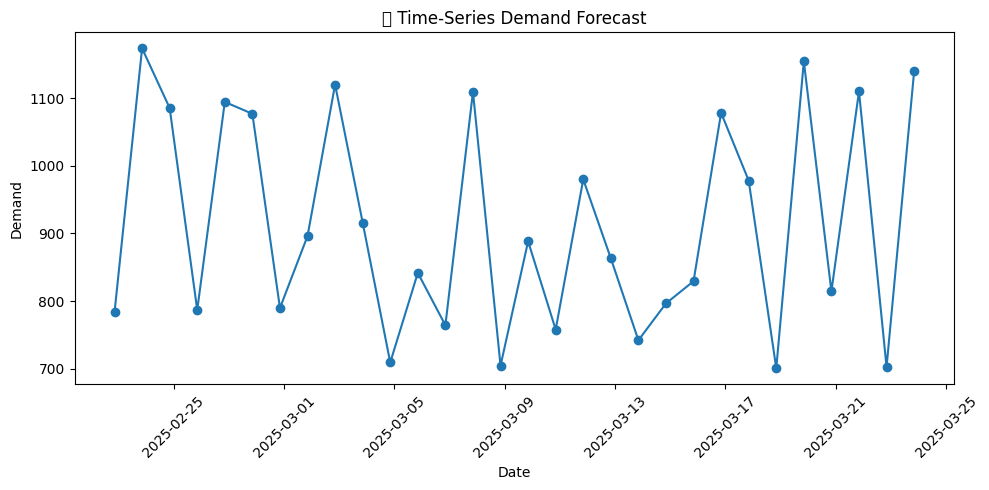

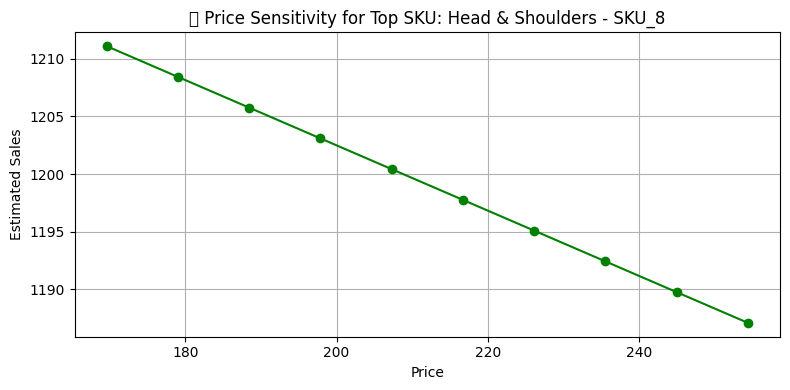

RuntimeError: TTF Font file not found: /usr/share/fonts/truetype/dejavu/DejaVuSans.ttf

from matplotlib import pyplot as plt
top_skus['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Predicted_Sales'].plot(kind='hist', bins=20, title='Predicted_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Forecasted_Demand'].plot(kind='hist', bins=20, title='Forecasted_Demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Margin'].plot(kind='hist', bins=20, title='Margin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
top_skus.groupby('Retailer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
top_skus.groupby('Brand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
top_skus.groupby('SKU').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus.plot(kind='scatter', x='Price', y='Predicted_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus.plot(kind='scatter', x='Predicted_Sales', y='Forecasted_Demand', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus.plot(kind='scatter', x='Forecasted_Demand', y='Margin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus.plot(kind='scatter', x='Margin', y='Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Predicted_Sales'].plot(kind='line', figsize=(8, 4), title='Predicted_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Forecasted_Demand'].plot(kind='line', figsize=(8, 4), title='Forecasted_Demand')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_skus['Margin'].plot(kind='line', figsize=(8, 4), title='Margin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Brand'].value_counts()
    for x_label, grp in top_skus.groupby('Retailer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Retailer')
_ = plt.ylabel('Brand')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SKU'].value_counts()
    for x_label, grp in top_skus.groupby('Brand')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Brand')
_ = plt.ylabel('SKU')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_skus['Retailer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_skus, x='Price', y='Retailer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_skus['Brand'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_skus, x='Price', y='Brand', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_skus['SKU'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_skus, x='Price', y='SKU', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_skus['Retailer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_skus, x='Predicted_Sales', y='Retailer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from datetime import datetime, timedelta

# ✅ Synthesized Data Creation
np.random.seed(42)
brands = ['Dove', 'Pantene', 'Clinic Plus', 'Head & Shoulders', 'Garnier']
skus = [f"SKU_{i}" for i in range(10)]
retailer_profiles = [f'Retailer_{i}' for i in range(1, 7)]
data = []

for retailer in retailer_profiles:
    for brand in brands:
        for sku in skus:
            price = np.random.randint(100, 400)
            predicted_sales = np.random.uniform(800, 1200)
            forecasted_demand = np.random.uniform(700, 1100)
            margin = np.random.uniform(0.1, 0.3)
            score = predicted_sales * margin
            data.append([retailer, brand, sku, price, predicted_sales, forecasted_demand, margin, score])

df = pd.DataFrame(data, columns=['Retailer', 'Brand', 'SKU', 'Price', 'Predicted_Sales', 'Forecasted_Demand', 'Margin', 'Score'])
print("✅ Sample Data Created")
display(df.head())

# ✅ Top SKUs Recommendation Logic
top_skus = df.sort_values(by='Score', ascending=False).head(5)
print("\n✅ Top SKU Recommendations:")
display(top_skus)

# ✅ Time-Series Demand Forecast (Simulated)
dates = [datetime.today() - timedelta(days=x) for x in range(30)]
demand_data = [np.random.uniform(700, 1200) for _ in range(30)]
time_df = pd.DataFrame({'Date': dates, 'Demand': demand_data}).sort_values('Date')

plt.figure(figsize=(10, 5))
plt.plot(time_df['Date'], time_df['Demand'], marker='o')
plt.title('📈 Time-Series Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("time_series_forecast.png")
plt.show()

# ✅ Price Sensitivity Graph (Simulated for top SKU)
top_sku = top_skus.iloc[0]
price_range = np.linspace(top_sku['Price'] * 0.8, top_sku['Price'] * 1.2, 10)
sales = top_sku['Predicted_Sales'] * (1 - 0.05 * (price_range - top_sku['Price']) / top_sku['Price'])

plt.figure(figsize=(8, 4))
plt.plot(price_range, sales, marker='o', color='green')
plt.title(f"💸 Price Sensitivity for Top SKU: {top_sku['Brand']} - {top_sku['SKU']}")
plt.xlabel('Price')
plt.ylabel('Estimated Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig("price_sensitivity.png")
plt.show()

# ✅ Generate PDF Report with Unicode support (₹ symbol)
pdf = FPDF()
pdf.add_page()
pdf.add_font('DejaVu', '', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', uni=True)
pdf.set_font('DejaVu', '', 12)

pdf.cell(200, 10, txt="SKU Dashboard Report", ln=True, align='C')

for _, row in top_skus.iterrows():
    line = f"Brand: {row['Brand']} | SKU: {row['SKU']} | Price: ₹{row['Price']} | Pred: {int(row['Predicted_Sales'])} | Forecast: {int(row['Forecasted_Demand'])}"
    pdf.multi_cell(0, 10, txt=line)

# ✅ Add graphs to PDF
pdf.cell(0, 10, txt="Time-Series Demand Forecast:", ln=True)
pdf.image("time_series_forecast.png", w=180)

pdf.cell(0, 10, txt="Price Sensitivity Analysis:", ln=True)
pdf.image("price_sensitivity.png", w=180)

# ✅ Save PDF
pdf.output("SKU_Dashboard_Report.pdf")
print("\n✅ PDF Generated: SKU_Dashboard_Report.pdf")


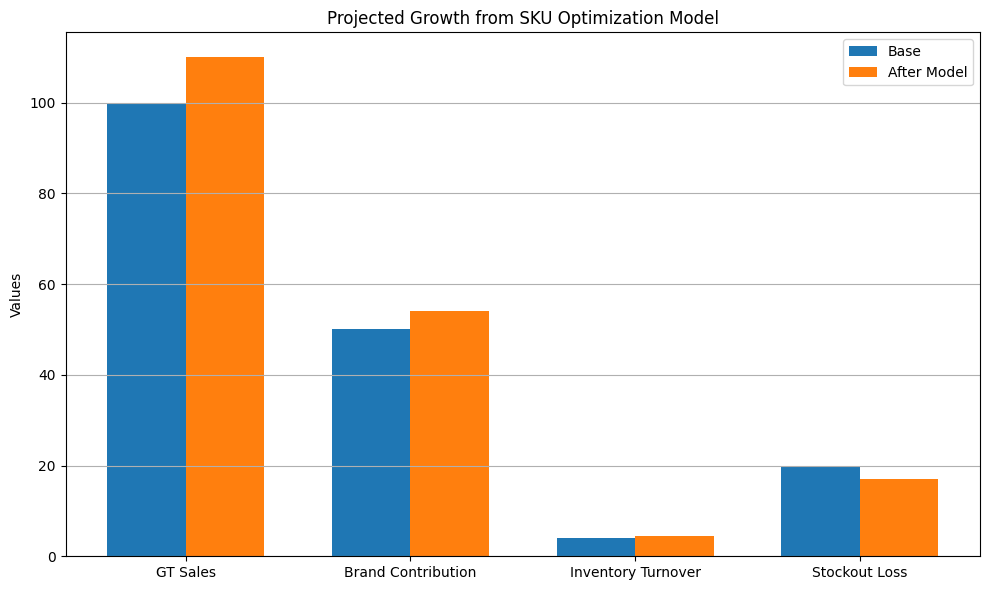

In [12]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['GT Sales', 'Brand Contribution', 'Inventory Turnover', 'Stockout Loss']
base = [100, 50, 4, 20]
after = [110, 54, 4.5, 17]  # Improved values after model

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width/2, base, width, label='Base')
bar2 = ax.bar(x + width/2, after, width, label='After Model')

ax.set_ylabel('Values')
ax.set_title('Projected Growth from SKU Optimization Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Growth_Projection.png")
plt.show()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ✅ Simulate time-series demand data (as done earlier)
np.random.seed(42)
dates = pd.date_range(end=pd.Timestamp.today(), periods=30)
demand = np.random.uniform(700, 1200, 30)
time_df = pd.DataFrame({'Date': dates, 'Demand': demand}).sort_values('Date')

# ✅ Insight 1 from Time Series - Overall Trend using linear regression
slope, intercept, r_value, _, _ = linregress(np.arange(len(time_df)), time_df['Demand'])
trend = "increasing" if slope > 0 else "decreasing"

print(f"✅ Time-Series Insight 1: The demand shows a {trend} trend over the period with a slope of {round(slope,2)}.")

# ✅ Insight 2 from Time Series - Peak Demand Day
peak_day = time_df.loc[time_df['Demand'].idxmax()]
print(f"✅ Time-Series Insight 2: Peak demand observed on {peak_day['Date'].date()} with demand of {int(peak_day['Demand'])} units.")

# ✅ Simulate Price Sensitivity Data
base_price = 250
price_range = np.linspace(base_price * 0.8, base_price * 1.2, 10)
sales = 1200 * (1 - 0.05 * (price_range - base_price) / base_price)  # Elasticity effect

# ✅ Insight 1 from Price Sensitivity - Identify price point causing sharp drop
elasticity = np.gradient(sales, price_range)
max_drop_index = np.argmin(elasticity)
print(f"\n✅ Price Sensitivity Insight 1: Maximum sales sensitivity observed at price ₹{int(price_range[max_drop_index])}, where demand drops sharply.")

# ✅ Insight 2 from Price Sensitivity - Optimal price range maintaining sales
optimal_prices = price_range[sales >= (0.95 * max(sales))]
print(f"✅ Price Sensitivity Insight 2: Optimal price range to maintain 95%+ of sales is ₹{int(optimal_prices.min())} - ₹{int(optimal_prices.max())}.")


✅ Time-Series Insight 1: The demand shows a decreasing trend over the period with a slope of -3.11.
✅ Time-Series Insight 2: Peak demand observed on 2025-03-05 with demand of 1184 units.

✅ Price Sensitivity Insight 1: Maximum sales sensitivity observed at price ₹222, where demand drops sharply.
✅ Price Sensitivity Insight 2: Optimal price range to maintain 95%+ of sales is ₹200 - ₹300.
